In [14]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("video_info.csv")
df.head()

,Channel,Title,Views,Post-Time
0,T-Series,#TujheBhulaDiya 😭#RanbirKapoor 👨‍🎤 #SadSongSta...,11K views,4 hours ago
1,T-Series,MASTI TAKITA DHUM (Full Vudio) Shabaash Mithu ...,22K views,6 hours ago
2,T-Series,Mere Dil Gaaye Ja (Zooby Zooby) Dhokha | R. Ma...,798K views,9 hours ago
3,T-Series,Ganpati Bappa Morya (Video Jukebox) Filmy Ganp...,94K views,17 hours ago
4,T-Series,Sabri Brothers: Teri Jawani Badi Mast Mast Hai...,78K views,1 day ago


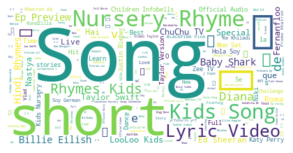

In [21]:
text = " ".join(word for word in df['Title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud.recolor(colormap='viridis', random_state = 17), interpolation='bilinear')
plt.axis("off")
plt.show()